#Importação das Bibliotecas

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold
from sklearn import tree
from sklearn.tree import plot_tree
from sklearn.inspection import permutation_importance
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, recall_score, f1_score
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix



#Abertura do Conjunto de Dados

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Edge-IIoTset dataset/Selected dataset for ML and DL/ML-EdgeIIoT-dataset.csv")
pd.set_option("display.max_columns", None)
#pd.set_option("display.max_rows", 10)
df.head()

<ipython-input-32-b869a261c901>:1: DtypeWarning: Columns (3,6,11,13,14,15,16,17,31,32,34,39,45,51,54,55) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/drive/MyDrive/Edge-IIoTset dataset/Selected dataset for ML and DL/ML-EdgeIIoT-dataset.csv")


,frame.time,ip.src_host,ip.dst_host,arp.dst.proto_ipv4,arp.opcode,arp.hw.size,arp.src.proto_ipv4,icmp.checksum,icmp.seq_le,icmp.transmit_timestamp,icmp.unused,http.file_data,http.content_length,http.request.uri.query,http.request.method,http.referer,http.request.full_uri,http.request.version,http.response,http.tls_port,tcp.ack,tcp.ack_raw,tcp.checksum,tcp.connection.fin,tcp.connection.rst,tcp.connection.syn,tcp.connection.synack,tcp.dstport,tcp.flags,tcp.flags.ack,tcp.len,tcp.options,tcp.payload,tcp.seq,tcp.srcport,udp.port,udp.stream,udp.time_delta,dns.qry.name,dns.qry.name.len,dns.qry.qu,dns.qry.type,dns.retransmission,dns.retransmit_request,dns.retransmit_request_in,mqtt.conack.flags,mqtt.conflag.cleansess,mqtt.conflags,mqtt.hdrflags,mqtt.len,mqtt.msg_decoded_as,mqtt.msg,mqtt.msgtype,mqtt.proto_len,mqtt.protoname,mqtt.topic,mqtt.topic_len,mqtt.ver,mbtcp.len,mbtcp.trans_id,mbtcp.unit_id,Attack_label,Attack_type
0,6.0,192.168.0.152,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,MITM
1,6.0,192.168.0.101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,MITM
2,6.0,192.168.0.152,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,MITM
3,6.0,192.168.0.101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,MITM
4,6.0,192.168.0.152,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,MITM


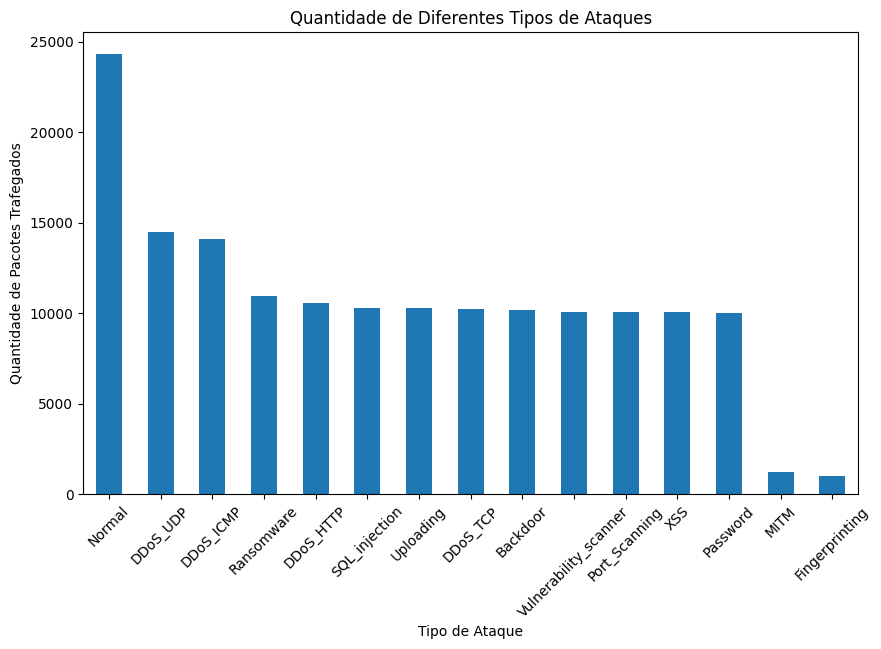

In [ ]:
#contagem de ataques do df ML
contagem_ataques = df['Attack_type'].value_counts()

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
contagem_ataques.plot(kind='bar')
plt.title('Quantidade de Diferentes Tipos de Ataques')
plt.xlabel('Tipo de Ataque')
plt.ylabel('Quantidade de Pacotes Trafegados')
plt.xticks(rotation=45)
plt.show()

In [ ]:
print(df['Attack_label'].value_counts())

Attack_label
1    133499
0     24301
Name: count, dtype: int64


#Divisão de Treino e Teste

In [ ]:
train = df.drop(["frame.time", "ip.src_host", "ip.dst_host", "arp.dst.proto_ipv4", "arp.src.proto_ipv4", "icmp.transmit_timestamp",
                 "http.file_data", "http.request.uri.query", "http.request.method", "http.referer", "http.request.full_uri", "http.request.version",
                 "tcp.options", "tcp.payload", "tcp.srcport", "tcp.seq",
                 "mqtt.protoname", "mqtt.topic", "mqtt.conack.flags", "mqtt.msg",
                 "dns.qry.name.len",
                 "Attack_label", "Attack_type"], axis = 1)
target = df["Attack_label"]

x_train, x_test, y_train, y_test = train_test_split(train, target, test_size = 0.3, random_state = 10)

#Normalizando os Dados

In [ ]:
scaler = StandardScaler()
x_train_norm = scaler.fit_transform(x_train)
x_test_norm = scaler.transform(x_test)

#Modelos de Aprendizado

##Árvore de Decisão (DT)

###Dados não normalizados

In [ ]:
dt = tree.DecisionTreeClassifier()
dt.fit(x_train, y_train)

dt_pred = dt.predict(x_test)
dt_pred

array([1, 0, 1, ..., 1, 0, 1])

In [ ]:
dt_accuracy = accuracy_score(dt_pred, y_test)
dt_recall = recall_score(dt_pred, y_test)
dt_f1 = f1_score(dt_pred, y_test)
dt_precisao = precision_score(dt_pred, y_test)


print(f'Acurácia DT: {dt_accuracy * 100}')
print(f'Precisão DT: {dt_precisao * 100}')
print(f'Recall DT: {dt_recall * 100}')
print(f'F1 DT: {dt_f1 * 100}')

Acurácia DT: 99.11491339247993
Precisão DT: 99.49274094804967
Recall DT: 99.46043165467626
F1 DT: 99.47658367790534


[[ 7106   215]
 [  208 39811]]


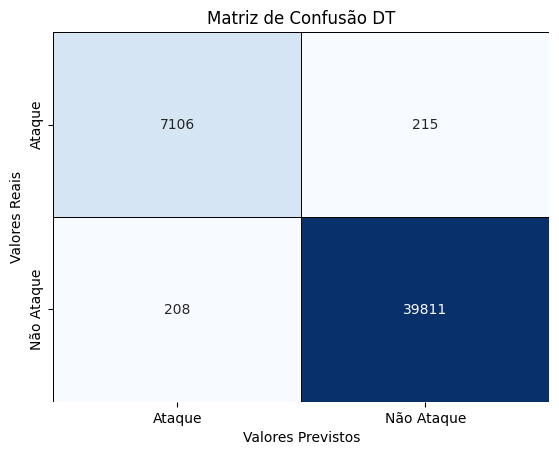

In [ ]:
#Matriz de confusão DT
cf_matrix = confusion_matrix(y_test, dt_pred)
print(cf_matrix)

# Criando o heatmap
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues', linecolor='black', linewidths=0.7, cbar= False)

# Inverter os rótulos dos ticks nos eixos
plt.xticks(ticks=[0.5, 1.5], labels=["Ataque", "Não Ataque"])
plt.yticks(ticks=[0.5, 1.5], labels=["Ataque", "Não Ataque"])

# Adicionar rótulos gerais
plt.xlabel('Valores Previstos')
plt.ylabel('Valores Reais')
plt.title('Matriz de Confusão DT')

plt.show()

<Axes: >

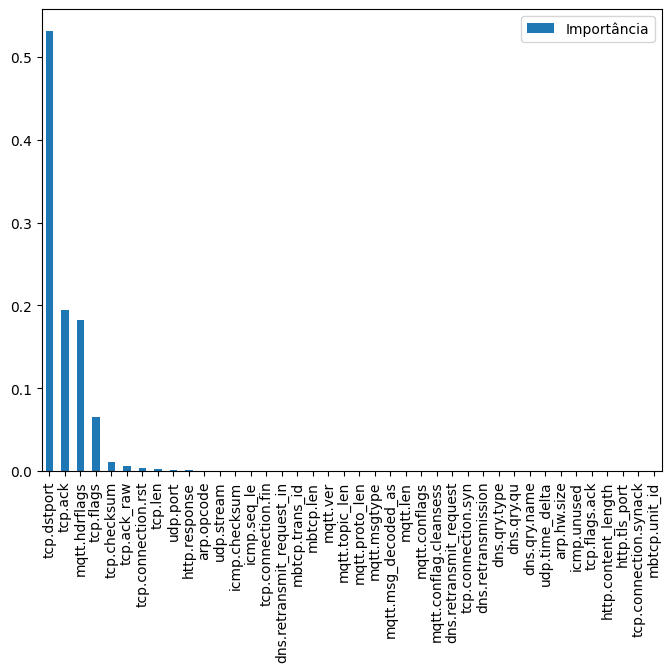

In [ ]:
feat_import = pd.DataFrame(dt.feature_importances_, index = train.columns, columns = ["Importância"])
feat_import.sort_values(by = "Importância", ascending = False, inplace = True)
feat_import.plot(kind = "bar", figsize = (8,6))

###Dados normalizados

In [ ]:
dt_norm = tree.DecisionTreeClassifier()
dt_norm.fit(x_train_norm, y_train)

dt_pred_norm = dt_norm.predict(x_test_norm)
dt_pred_norm

array([1, 0, 1, ..., 1, 0, 1])

In [ ]:
dt_accuracy_norm = accuracy_score(dt_pred_norm, y_test)
dt_precisao_norm = precision_score(dt_pred_norm, y_test)
dt_recall_norm = recall_score(dt_pred_norm, y_test)
dt_f1_norm = f1_score(dt_pred_norm, y_test)

print(f'Acurácia DT: {dt_accuracy_norm * 100}')
print(f'Precisão DT: {dt_precisao_norm * 100}')
print(f'Recall DT: {dt_recall_norm * 100}')
print(f'F1 DT: {dt_f1_norm * 100}')

Acurácia DT: 98.3185466835657
Precisão DT: 99.09792848397011
Recall DT: 98.9150225725189
F1 DT: 99.00639105252647


[[ 6898   423]
 [  353 39666]]


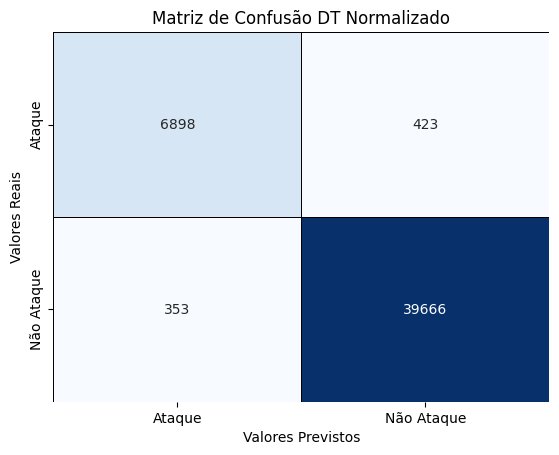

In [ ]:
#Matriz de confusão DT normalizada
cf_matrix = confusion_matrix(y_test, dt_pred_norm)
print(cf_matrix)

# Criando o heatmap
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues', linecolor='black', linewidths=0.7, cbar= False)

# Inverter os rótulos dos ticks nos eixos
plt.xticks(ticks=[0.5, 1.5], labels=["Ataque", "Não Ataque"])
plt.yticks(ticks=[0.5, 1.5], labels=["Ataque", "Não Ataque"])

# Adicionar rótulos gerais
plt.xlabel('Valores Previstos')
plt.ylabel('Valores Reais')
plt.title('Matriz de Confusão DT Normalizado')

plt.show()

###Importância das Features

<Axes: >

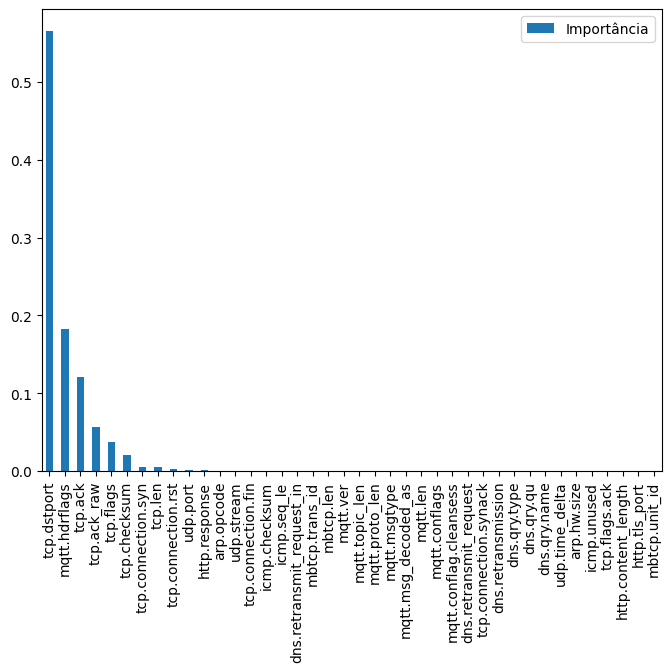

In [ ]:
feat_import = pd.DataFrame(dt_norm.feature_importances_, index = train.columns, columns = ["Importância"])
feat_import.sort_values(by = "Importância", ascending = False, inplace = True)
feat_import.plot(kind = "bar", figsize = (8,6))

##Random Forest (RF)

###Dados não normalizados

In [ ]:
rf = RandomForestClassifier(random_state=0, n_jobs=-1)
rf.fit(x_train, y_train)

rf_pred = rf.predict(x_test)
rf_pred

array([1, 0, 1, ..., 1, 0, 1])

In [ ]:
rf_accuracy = accuracy_score(rf_pred, y_test)
rf_precisao = precision_score(rf_pred, y_test)
rf_recall = recall_score(rf_pred, y_test)
rf_f1 = f1_score(rf_pred, y_test)
#Precisão
#Recall
#F1 score

print(f'Acurácia RF: {rf_accuracy * 100}')
print(f'Precisão RF: {rf_precisao * 100}')
print(f'Recall RF: {rf_recall * 100}')
print(f'F1 RF: {rf_f1 * 100}')

Acurácia RF: 99.24376848331221
Precisão RF: 99.56270771383593
Recall RF: 99.54280860419217
F1 RF: 99.55275716463034


[[ 7138   183]
 [  175 39844]]


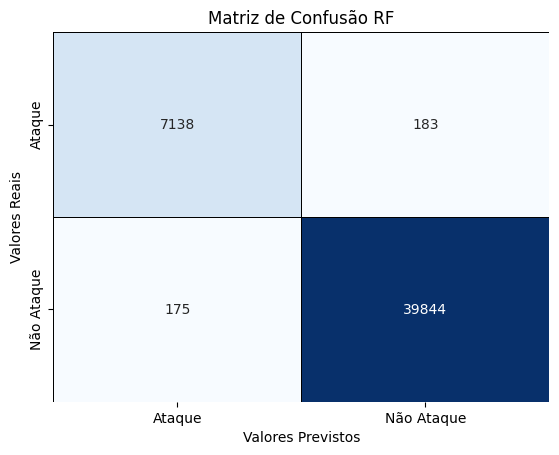

In [ ]:
#martriz de confusão
cf_matrix = confusion_matrix(y_test, rf_pred)
print(cf_matrix)

# Criando o heatmap
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues', linecolor='black', linewidths=0.7, cbar= False)

# Inverter os rótulos dos ticks nos eixos
plt.xticks(ticks=[0.5, 1.5], labels=["Ataque", "Não Ataque"])
plt.yticks(ticks=[0.5, 1.5], labels=["Ataque", "Não Ataque"])

# Adicionar rótulos gerais
plt.xlabel('Valores Previstos')
plt.ylabel('Valores Reais')
plt.title('Matriz de Confusão RF')

plt.show()

###Importância das features

<Axes: >

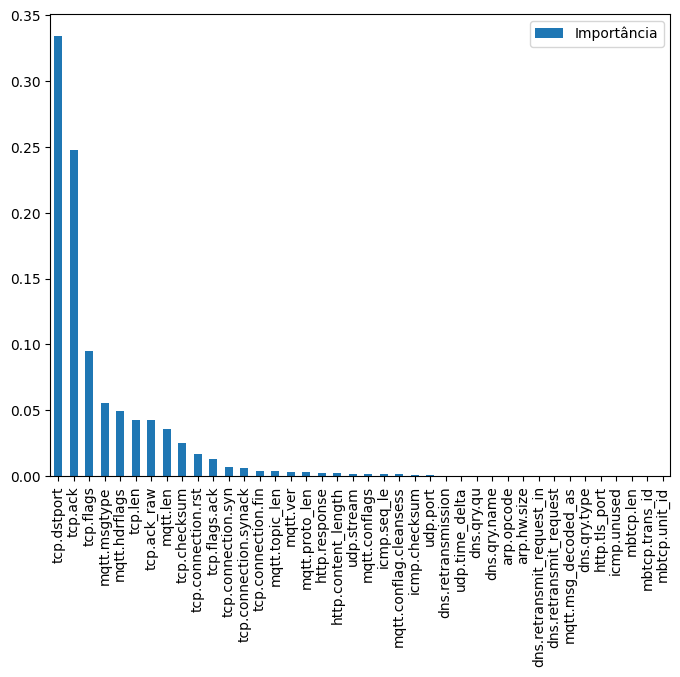

In [ ]:
feat_import = pd.DataFrame(rf.feature_importances_, index = train.columns, columns = ["Importância"])
feat_import.sort_values(by = "Importância", ascending = False, inplace = True)
feat_import.plot(kind = "bar", figsize = (8,6))

###Dados Normalizados

In [ ]:
rf_norm = RandomForestClassifier(random_state=0, n_jobs=-1)
rf.fit(x_train_norm, y_train)

rf_pred = rf.predict(x_test_norm)
rf_pred

array([1, 0, 1, ..., 1, 0, 1])

In [ ]:
rf_accuracy = accuracy_score(rf_pred, y_test)
rf_precisao = precision_score(rf_pred, y_test)
rf_recall = recall_score(rf_pred, y_test)
rf_f1 = f1_score(rf_pred, y_test)


print(f'Acurácia RF: {rf_accuracy * 100}')
print(f'Precisão RF: {rf_precisao * 100}')
print(f'Recall RF: {rf_recall * 100}')
print(f'F1 RF: {rf_f1 * 100}')

Acurácia RF: 98.53189691592733
Precisão RF: 99.38279317324272
Recall RF: 98.88612630532073
F1 RF: 99.13383765999077


[[ 6873   448]
 [  247 39772]]


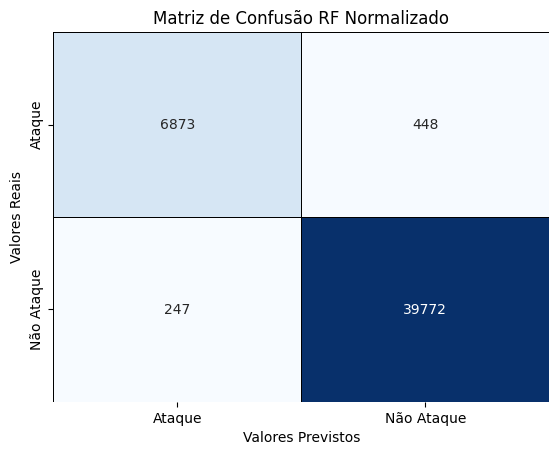

In [ ]:
# matriz de confusão
cf_matrix = confusion_matrix(y_test, rf_pred)
print(cf_matrix)

# Criando o heatmap
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues', linecolor='black', linewidths=0.7, cbar= False)

# Inverter os rótulos dos ticks nos eixos
plt.xticks(ticks=[0.5, 1.5], labels=["Ataque", "Não Ataque"])
plt.yticks(ticks=[0.5, 1.5], labels=["Ataque", "Não Ataque"])

# Adicionar rótulos gerais
plt.xlabel('Valores Previstos')
plt.ylabel('Valores Reais')
plt.title('Matriz de Confusão RF Normalizado')

plt.show()

###Importância das Features

<Axes: >

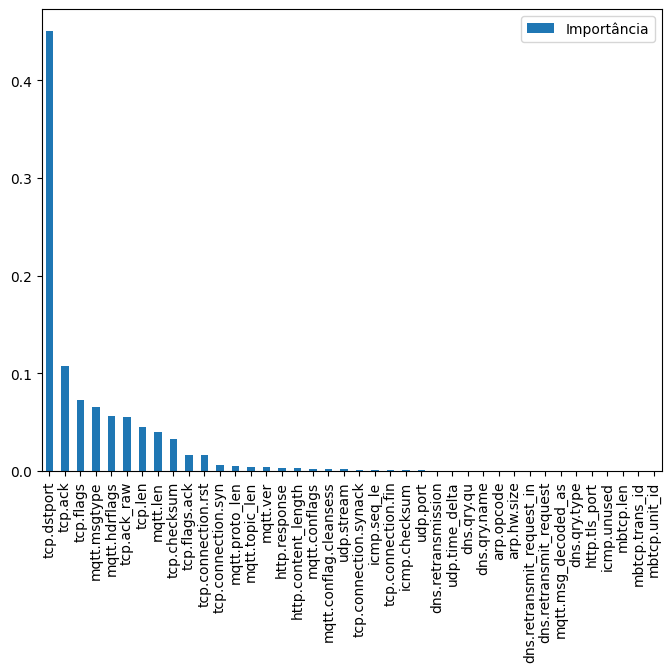

In [ ]:
feat_import = pd.DataFrame(rf_norm.feature_importances_, index = train.columns, columns = ["Importância"])
feat_import.sort_values(by = "Importância", ascending = False, inplace = True)
feat_import.plot(kind = "bar", figsize = (8,6))

##Support Vector Machine (SVM)

###Dados não normalizados

In [ ]:
svm = LinearSVC()
svm.fit(x_train, y_train)

svm_pred = svm.predict(x_test)
svm_pred

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
svm_accuracy = accuracy_score(svm_pred, y_test)
svm_precisao = precision_score(svm_pred, y_test)
svm_recall = recall_score(svm_pred, y_test)
svm_f1 = f1_score(svm_pred, y_test)

print(f'Acurácia SVM: {svm_accuracy * 100}')
print(f'Precisão SVM: {svm_precisao * 100}')
print(f'Recall SVM: {svm_recall * 100}')
print(f'F1 SVM: {svm_f1 * 100}')

Acurácia SVM: 84.5352767215885
Precisão SVM: 100.0
Recall SVM: 84.5352767215885
F1 SVM: 91.619638503188


[[    0  7321]
 [    0 40019]]


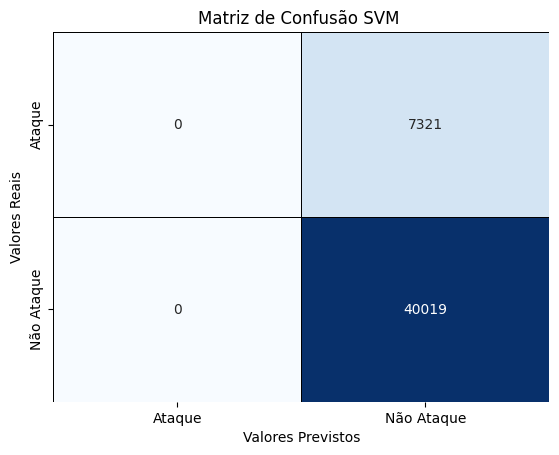

In [ ]:
#matriz de confusão
cf_matrix = confusion_matrix(y_test, svm_pred)
print(cf_matrix)

# Criando o heatmap
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues', linecolor='black', linewidths=0.7, cbar= False)

# Inverter os rótulos dos ticks nos eixos
plt.xticks(ticks=[0.5, 1.5], labels=["Ataque", "Não Ataque"])
plt.yticks(ticks=[0.5, 1.5], labels=["Ataque", "Não Ataque"])

# Adicionar rótulos gerais
plt.xlabel('Valores Previstos')
plt.ylabel('Valores Reais')
plt.title('Matriz de Confusão SVM ')

plt.show()


###Impotância das features

In [ ]:
  features__ = x_train.columns.values
  importances_= []
  features_ = []
  importances_coef = svm.coef_[0]
  for feature, importance in enumerate (importances_coef):
    if (importance != 0):
      importances_.append(importance)
      features_.append(features__[feature])
      print("%s: %f" % (features__[feature], importance))

arp.opcode: 0.000000
arp.hw.size: 0.000000
icmp.checksum: 0.000000
icmp.seq_le: 0.000000
http.content_length: 0.000000
http.response: 0.000000
tcp.ack: 0.000000
tcp.ack_raw: 0.000000
tcp.checksum: 0.000000
tcp.connection.fin: -0.000000
tcp.connection.rst: 0.000000
tcp.connection.syn: 0.000000
tcp.connection.synack: -0.000000
tcp.dstport: 0.000000
tcp.flags: 0.000000
tcp.flags.ack: 0.000000
tcp.len: 0.000000
udp.port: -0.000000
udp.stream: 0.000001
udp.time_delta: 0.000000
dns.qry.name: 0.000000
dns.qry.qu: 0.000000
dns.retransmission: -0.000000
mqtt.conflag.cleansess: -0.000000
mqtt.conflags: -0.000000
mqtt.hdrflags: -0.000000
mqtt.len: -0.000000
mqtt.msgtype: -0.000000
mqtt.proto_len: -0.000000
mqtt.topic_len: -0.000000
mqtt.ver: -0.000000


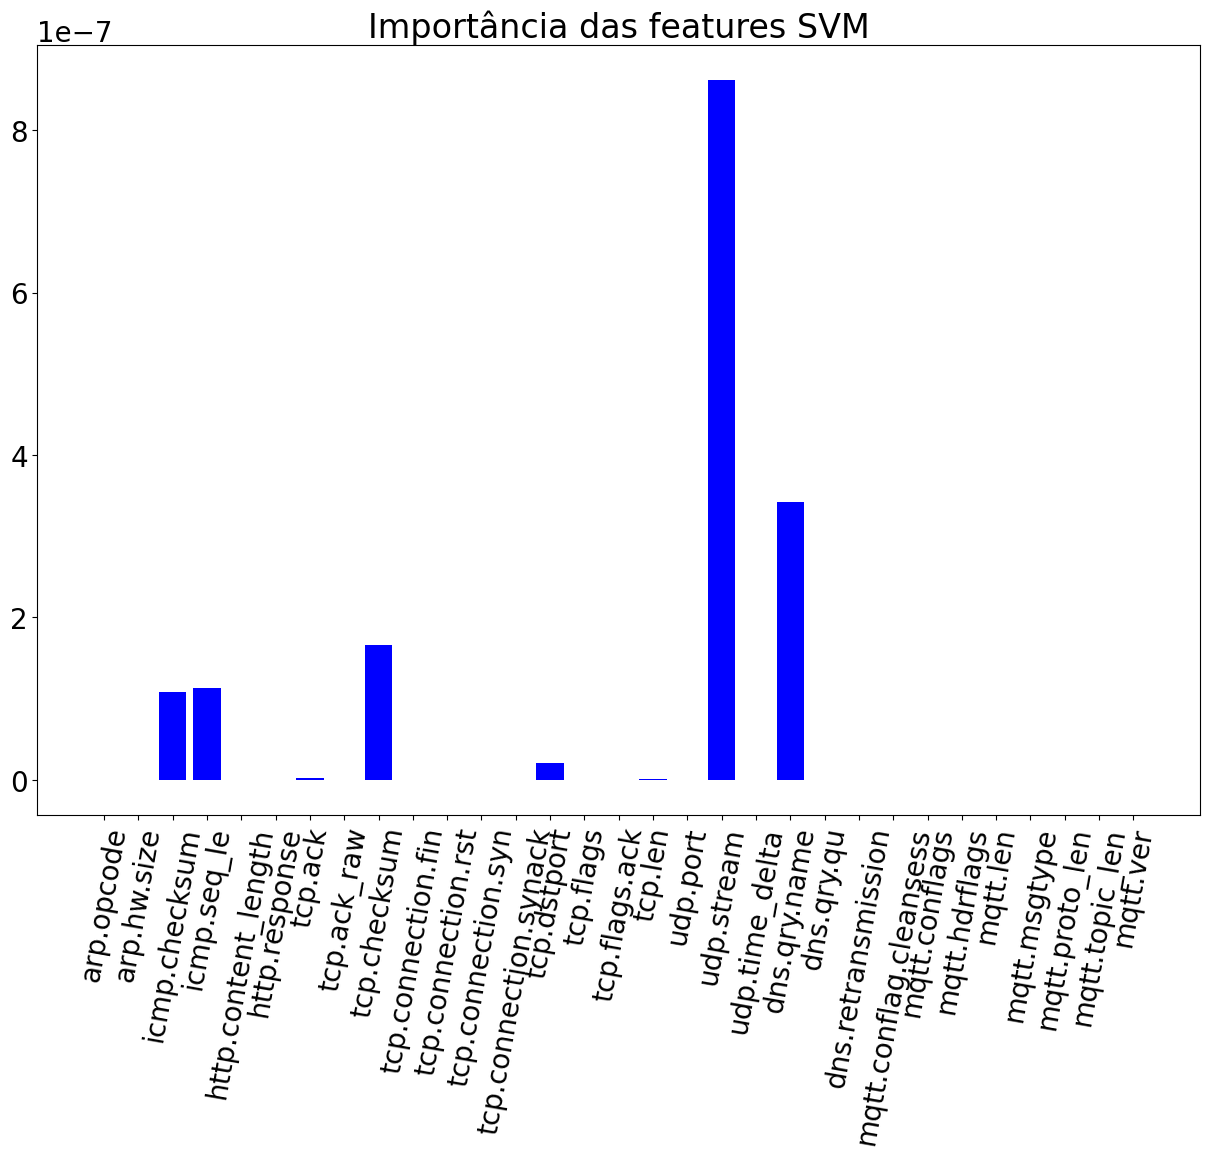

In [ ]:
plt.figure(figsize=(15, 10))
font = {'size': 20}
plt.rc('font', **font)

plt.bar(features_, importances_, color="blue")
plt.xticks (features_, rotation = 80, fontsize = 20)

plt.title('Importância das features SVM')
plt.show()

###Dados normalizados

In [ ]:
svm_norm = LinearSVC()
svm.fit(x_train_norm, y_train)

svm_pred = svm.predict(x_test_norm)
svm_pred

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
svm_accuracy = accuracy_score(svm_pred, y_test)
svm_precisao = precision_score(svm_pred, y_test)
svm_recall = recall_score(svm_pred, y_test)
svm_f1 = f1_score(svm_pred, y_test)

print(f'Acurácia SVM: {svm_accuracy * 100}')
print(f'Precisão SVM: {svm_precisao * 100}')
print(f'Recall SVM: {svm_recall * 100}')
print(f'F1 SVM: {svm_f1 * 100}')

Acurácia SVM: 87.78833967046896
Precisão SVM: 99.96751543017068
Recall SVM: 87.39896010835847
F1 SVM: 93.26168801650483


[[ 1553  5768]
 [   13 40006]]


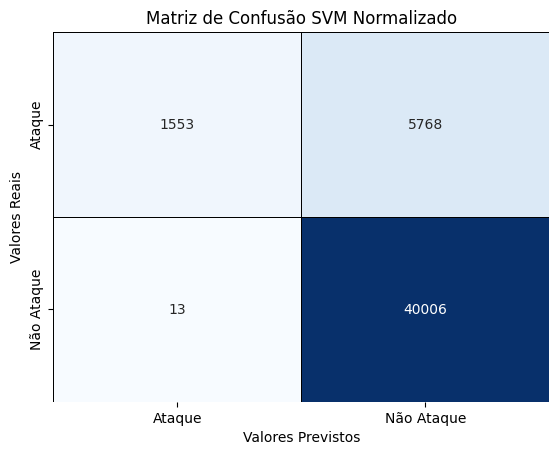

In [ ]:
#matriz de confusão
cf_matrix = confusion_matrix(y_test, svm_pred)
print(cf_matrix)

# Criando o heatmap
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues', linecolor='black', linewidths=0.7, cbar= False)

# Inverter os rótulos dos ticks nos eixos
plt.xticks(ticks=[0.5, 1.5], labels=["Ataque", "Não Ataque"])
plt.yticks(ticks=[0.5, 1.5], labels=["Ataque", "Não Ataque"])

# Adicionar rótulos gerais
plt.xlabel('Valores Previstos')
plt.ylabel('Valores Reais')
plt.title('Matriz de Confusão SVM Normalizado')

plt.show()

###Importância das Features

In [ ]:
features__ = x_train.columns.values
importances_= []
features_ = []
importances_coef = svm.coef_[0]
for feature, importance in enumerate (importances_coef):
  if (importance != 0):
    importances_.append(importance)
    features_.append(features__[feature])
    print("%s: %f" % (features__[feature], importance))



arp.opcode: 0.009075
arp.hw.size: 0.056376
icmp.checksum: 2.165340
icmp.seq_le: 1.108243
http.content_length: 0.946370
http.response: 0.116710
tcp.ack: 0.045879
tcp.ack_raw: 0.002199
tcp.checksum: -0.038301
tcp.connection.fin: 0.026896
tcp.connection.rst: 0.050217
tcp.connection.syn: 0.180034
tcp.connection.synack: -0.001575
tcp.dstport: -0.155732
tcp.flags: 0.230082
tcp.flags.ack: 0.039418
tcp.len: -0.137978
udp.port: -3.788433
udp.stream: 4.490996
udp.time_delta: 0.261325
dns.qry.name: 0.251700
dns.qry.qu: 0.353219
dns.retransmission: -2.274424
mqtt.conflag.cleansess: -0.209425
mqtt.conflags: -0.209425
mqtt.hdrflags: -0.441921
mqtt.len: -0.488878
mqtt.msgtype: -0.441921
mqtt.proto_len: -0.209425
mqtt.topic_len: -0.046495
mqtt.ver: -0.209425


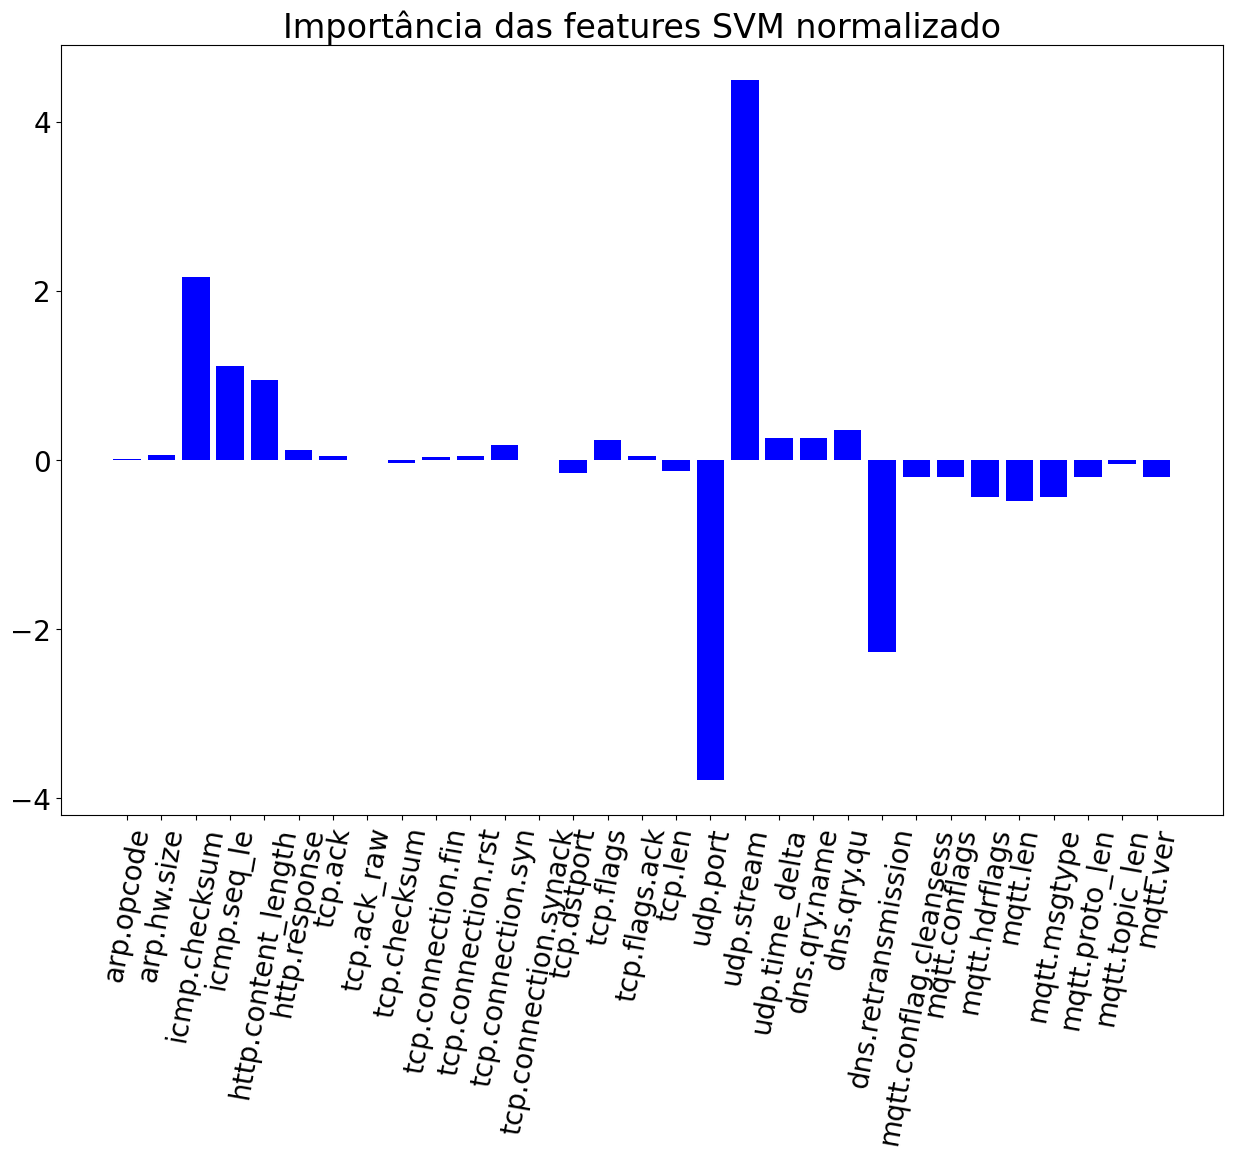

In [ ]:
  plt.figure(figsize=(15, 10))
  font = {'size': 20}
  plt.rc('font', **font)

  plt.bar(features_, importances_, color="blue")
  plt.xticks (features_, rotation = 80, fontsize = 20)

  plt.title('Importância das features SVM normalizado')
  plt.show()

##K-Nearest Neighbors (KNN)

###Dados não normalizados

In [ ]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train, y_train)

knn_pred = knn.predict(x_test)
knn_pred

array([1, 0, 1, ..., 1, 1, 1])

In [ ]:
knn_accuracy = accuracy_score(knn_pred, y_test)
knn_precisao = precision_score(knn_pred, y_test)
knn_recall = recall_score(knn_pred, y_test)
knn_f1 = f1_score(knn_pred, y_test)
#Precisão
#Recall
#F1 score

print(f'Acurácia KNN: {knn_accuracy * 100}')
print(f'Precisão KNN: {knn_precisao * 100}')
print(f'Recall KNN: {knn_recall * 100}')
print(f'F1 KNN: {knn_f1 * 100}')

Acurácia KNN: 88.12843261512462
Precisão KNN: 97.60613708488468
Recall KNN: 89.33741966470737
F1 KNN: 93.28891117957536


[[ 2659  4662]
 [  958 39061]]


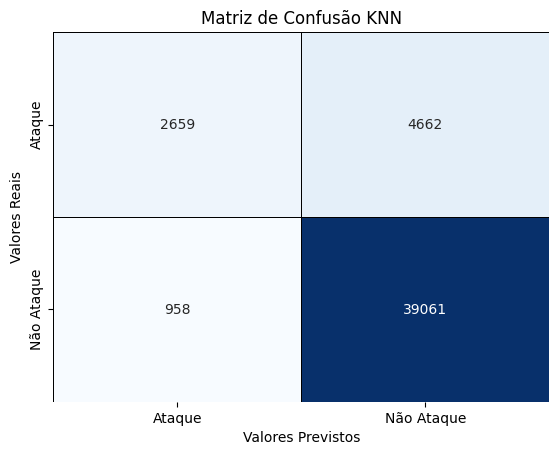

In [ ]:
#matriz de confusão
cf_matrix = confusion_matrix(y_test, knn_pred)
print(cf_matrix)
# Criando o heatmap
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues', linecolor='black', linewidths=0.7, cbar= False)

# Inverter os rótulos dos ticks nos eixos
plt.xticks(ticks=[0.5, 1.5], labels=["Ataque", "Não Ataque"])
plt.yticks(ticks=[0.5, 1.5], labels=["Ataque", "Não Ataque"])

# Adicionar rótulos gerais
plt.xlabel('Valores Previstos')
plt.ylabel('Valores Reais')
plt.title('Matriz de Confusão KNN')

plt.show()

In [ ]:
features__ = x_train.columns.values
importances_= []
features_ = []
importances_coef = permutation_importance(knn, x_train_norm, y_train, scoring='accuracy')
importance = importances_coef.importances_mean
for feature, importance in enumerate (importance):
   if (importance != 0):
      importances_.append(importance)
      features_.append(features__[feature])
      print("%s: %f" % (features__[feature], importance))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


KeyboardInterrupt: 

###Dados normalizados

In [ ]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train_norm, y_train)

knn_pred = knn.predict(x_test_norm)
knn_pred

array([1, 0, 1, ..., 1, 0, 1])

In [ ]:
knn_accuracy = accuracy_score(knn_pred, y_test)
knn_precisao = precision_score(knn_pred, y_test)
knn_recall = recall_score(knn_pred, y_test)
knn_f1 = f1_score(knn_pred, y_test)
#Precisão
#Recall
#F1 score

print(f'Acurácia KNN: {knn_accuracy * 100}')
print(f'Precisão KNN: {knn_precisao * 100}')
print(f'Recall KNN: {knn_recall * 100}')
print(f'F1 KNN: {knn_f1 * 100}')

Acurácia KNN: 95.85973806506126
Precisão KNN: 98.20585222019541
Recall KNN: 96.93658584712527
F1 KNN: 97.56709118442939


[[ 6079  1242]
 [  718 39301]]


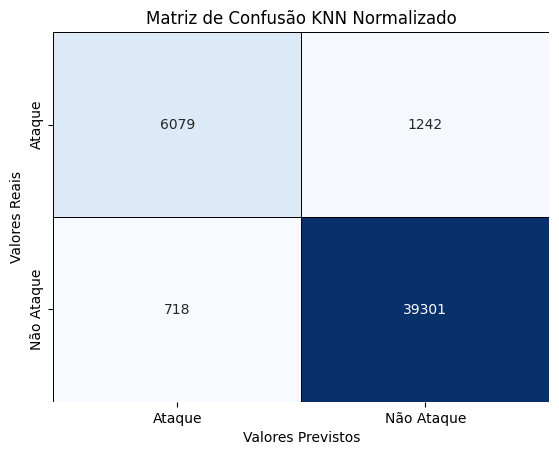

In [ ]:
#matriz de confusão
cf_matrix = confusion_matrix(y_test, knn_pred)
print(cf_matrix)
# Criando o heatmap
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues', linecolor='black', linewidths=0.7, cbar= False)

# Inverter os rótulos dos ticks nos eixos
plt.xticks(ticks=[0.5, 1.5], labels=["Ataque", "Não Ataque"])
plt.yticks(ticks=[0.5, 1.5], labels=["Ataque", "Não Ataque"])

# Adicionar rótulos gerais
plt.xlabel('Valores Previstos')
plt.ylabel('Valores Reais')
plt.title('Matriz de Confusão KNN Normalizado')

plt.show()

###Importância das Features

In [ ]:
features__ = x_train.columns.values
importances_= []
features_ = []
importances_coef = permutation_importance(knn, x_train_norm, y_train, scoring='accuracy')
importance = importances_coef.importances_mean
for feature, importance in enumerate (importance):
  if (importance != 0):
    importances_.append(importance)
    features_.append(features__[feature])
    print("%s: %f" % (features__[feature], importance))

In [ ]:
  plt.figure(figsize=(15, 10))
  font = {'size': 20}
  plt.rc('font', **font)

  plt.bar(features_, importances_, color="blue")
  plt.xticks (features_, rotation = 80, fontsize = 20)


  plt.title('')
  plt.show()

NameError: name 'features_' is not defined

<Figure size 1500x1000 with 0 Axes>

##Naive Bayes (NB)

###Dados não normalizados

In [ ]:
NB = BernoulliNB()
NB.fit(x_train, y_train)

NB_pred = NB.predict(x_test)
NB_pred

array([0, 1, 1, ..., 1, 1, 1])

In [ ]:
NB_accuracy = accuracy_score(NB_pred, y_test)
NB_precisao = precision_score(NB_pred, y_test)
NB_recall = recall_score(NB_pred, y_test)
NB_f1 = f1_score(NB_pred, y_test)
#Precisão
#Recall
#F1 score

print(f'Acurácia NB: {NB_accuracy * 100}')
print(f'Precisão NB: {NB_precisao * 100}')
print(f'Recall NB: {NB_recall * 100}')
print(f'F1 NB: {NB_f1 * 100}')

Acurácia NB: 83.17912970004224
Precisão NB: 92.49356555636072
Recall NB: 88.18554343164816
F1 NB: 90.288195333748


[[ 2362  4959]
 [ 3004 37015]]


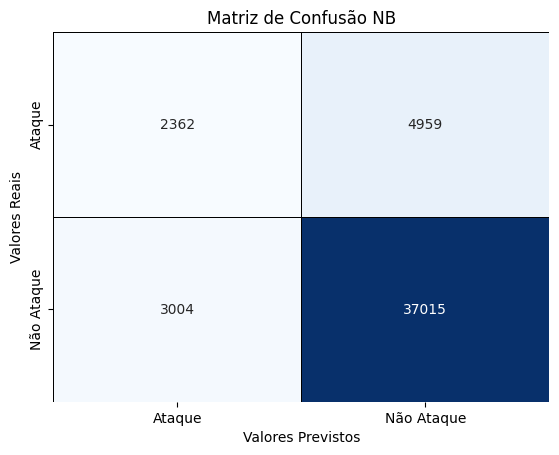

In [ ]:
#matriz de confusão
cf_matrix = confusion_matrix(y_test, NB_pred)
print(cf_matrix)
# Criando o heatmap
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues', linecolor='black', linewidths=0.7, cbar= False, annot_kws={"size": 10})

# Inverter os rótulos dos ticks nos eixos
plt.xticks(ticks=[0.5, 1.5], labels=["Ataque", "Não Ataque"], fontsize=10)
plt.yticks(ticks=[0.5, 1.5], labels=["Ataque", "Não Ataque"], fontsize=10)

# Adicionar rótulos gerais
plt.xlabel("Valores Previstos", fontsize=10)
plt.ylabel("Valores Reais", fontsize=10)
plt.title("Matriz de Confusão NB", fontsize=12)

plt.show()

###Importância das features

In [ ]:
features__ = x_train.columns.values # Nomes das colunas são extaridos e armazenados
importances_= []
features_ = []
importances_coef = permutation_importance(NB, x_train, y_train, scoring='accuracy') #calcula a importância de cada característica embaralhando aleatoriamente os valores
importance = importances_coef.importances_mean
for feature, importance in enumerate (importance):
    if (importance != 0):
      importances_.append(importance)
      features_.append(features__[feature])
      print("%s: %f" % (features__[feature], importance))


arp.opcode: -0.000460
arp.hw.size: -0.000460
icmp.checksum: -0.004322
icmp.seq_le: -0.004592
http.content_length: -0.002725
http.response: -0.002135
tcp.ack: -0.013951
tcp.ack_raw: -0.013951
tcp.checksum: -0.010156
tcp.connection.fin: -0.015173
tcp.connection.syn: -0.005912
tcp.connection.synack: -0.004072
tcp.dstport: -0.010156
tcp.flags: -0.010156
tcp.flags.ack: -0.017052
udp.port: -0.000110
udp.stream: -0.004387
udp.time_delta: -0.000110
dns.qry.name: -0.000449
dns.qry.qu: -0.000007
dns.retransmission: 0.000049
mqtt.conflag.cleansess: 0.003377
mqtt.conflags: 0.003377
mqtt.hdrflags: 0.013561
mqtt.len: 0.010094
mqtt.msgtype: 0.013561
mqtt.proto_len: 0.003377
mqtt.topic_len: 0.003458
mqtt.ver: 0.003377


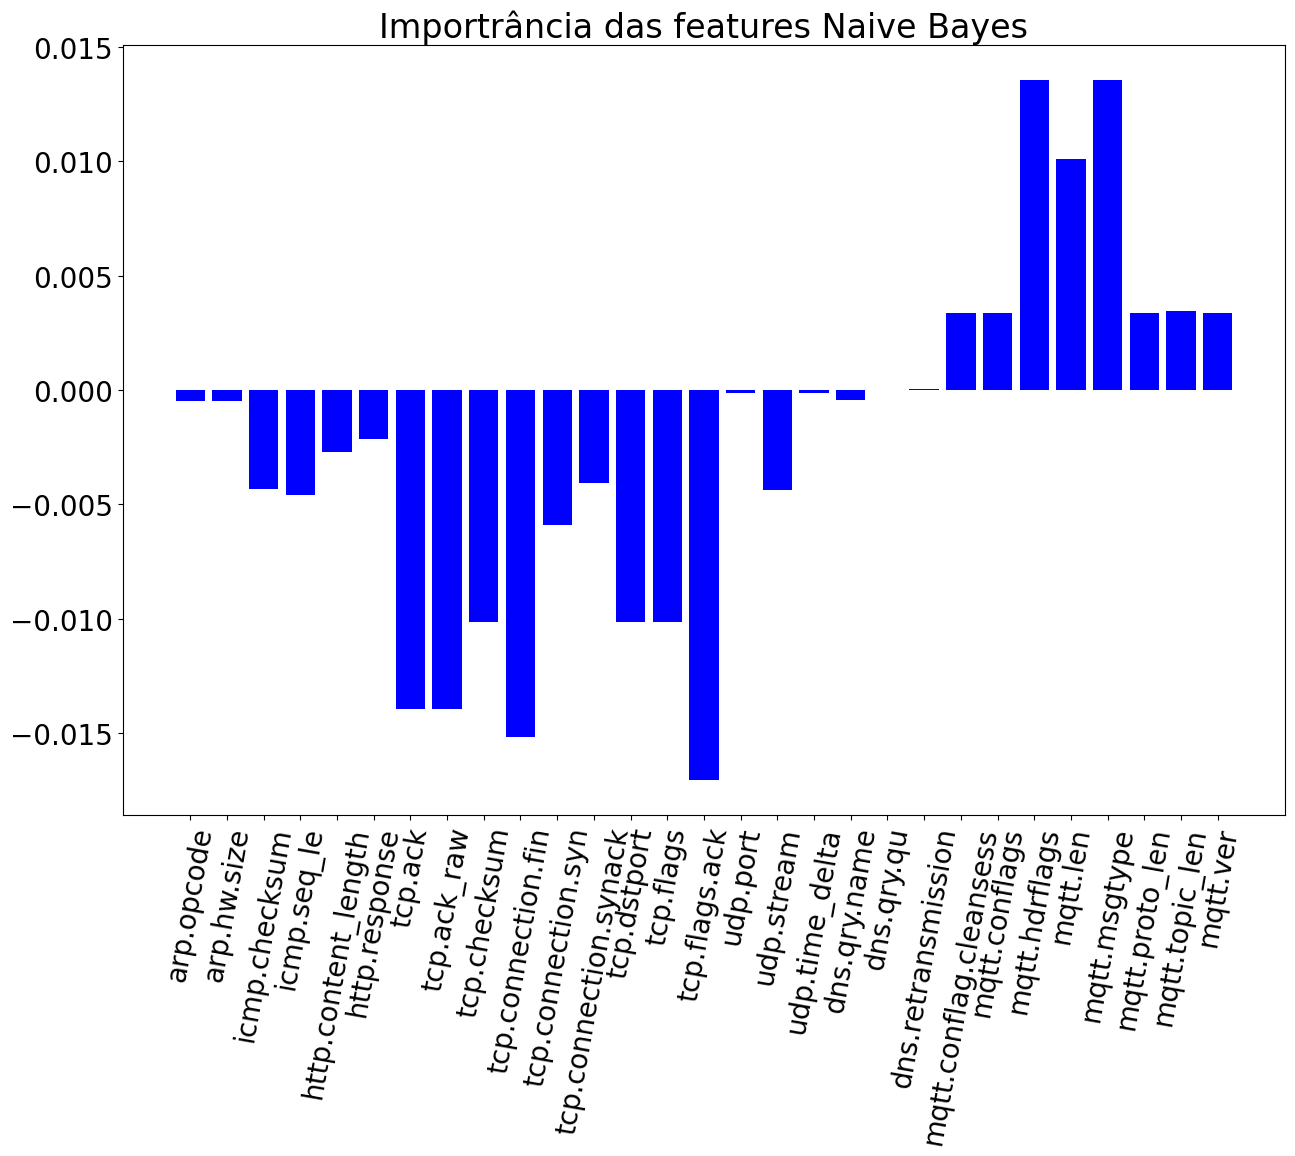

In [ ]:
plt.figure(figsize=(15, 10))
font = {'size': 20}
plt.rc('font', **font)

plt.bar(features_, importances_, color="blue")
plt.xticks (features_, rotation = 80, fontsize = 20)

plt.title('Importrância das features Naive Bayes')
plt.show()

###Dados normalizados

In [ ]:
NB_norm = BernoulliNB()
NB_norm.fit(x_train_norm, y_train)

NB_pred = NB.predict(x_test_norm)
NB_pred

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but BernoulliNB was fitted with feature names
  warnings.warn(


array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
NB_accuracy = accuracy_score(NB_pred, y_test)
NB_precisao = precision_score(NB_pred, y_test)
NB_recall = recall_score(NB_pred, y_test)
NB_f1 = f1_score(NB_pred, y_test)
#Precisão
#Recall
#F1 score

print(f'Acurácia NB: {NB_accuracy * 100}')
print(f'Precisão NB: {NB_precisao * 100}')
print(f'Recall NB: {NB_recall * 100}')
print(f'F1 NB: {NB_f1 * 100}')

Acurácia NB: 87.79467680608364
Precisão NB: 100.0
Recall NB: 87.38345306461122
F1 NB: 93.26698983872471


O algoritmo Naive Bayes é um classificador probabilístico que assume que as características (features) são independentes entre si, daí o termo “naive” (ingênuo). Essa é uma simplificação feita para facilitar o cálculo das probabilidades condicionais necessárias para classificação.


A principal característica do algoritmo é que ele desconsidera completamente a correlação entre as variáveis (features).

Por ser muito simples e rápido, possui um desempenho relativamente maior do que outros classificadores. Além disso, o Naive Bayes só precisa de um pequeno número de dados de teste para concluir classificações com uma boa precisão.

---

[[ 2362  4959]
 [ 3004 37015]]


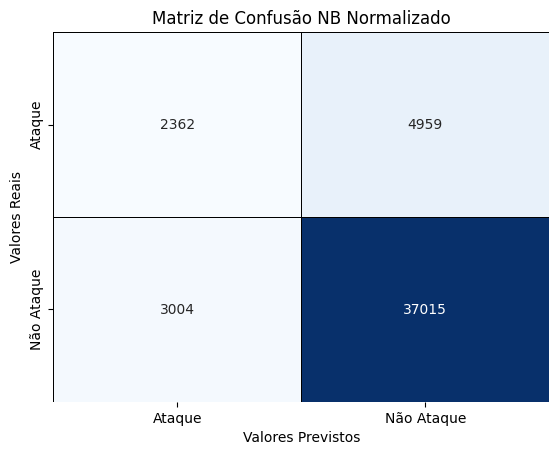

In [ ]:
#matriz de confusão
cf_matrix = confusion_matrix(y_test, NB_pred)
print(cf_matrix)
# Criando o heatmap
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues', linecolor='black', linewidths=0.7, cbar= False, annot_kws={"size": 10})

# Inverter os rótulos dos ticks nos eixos
# Inverter os rótulos dos ticks nos eixos
plt.xticks(ticks=[0.5, 1.5], labels=["Ataque", "Não Ataque"], fontsize=10)
plt.yticks(ticks=[0.5, 1.5], labels=["Ataque", "Não Ataque"], fontsize=10)

# Adicionar rótulos gerais
plt.xlabel("Valores Previstos", fontsize=10)
plt.ylabel("Valores Reais", fontsize=10)
plt.title("Matriz de Confusão NB Normalizado", fontsize=12)

plt.show()

###Importância das Features

In [ ]:
  features__ = x_train.columns.values
  importances_= []
  features_ = []
  importances_coef = permutation_importance(NB_norm, x_train_norm, y_train, scoring='accuracy')
  importance = importances_coef.importances_mean
  for feature, importance in enumerate (importance):
    if (importance != 0):
      importances_.append(importance)
      features_.append(features__[feature])
      print("%s: %f" % (features__[feature], importance))

arp.opcode: -0.000214
arp.hw.size: -0.000214
icmp.checksum: -0.001883
icmp.seq_le: -0.002062
http.content_length: -0.001209
http.response: -0.000869
tcp.ack: -0.001448
tcp.ack_raw: -0.001997
tcp.checksum: -0.001092
tcp.connection.fin: -0.003954
tcp.connection.syn: -0.002797
tcp.connection.synack: -0.006996
tcp.dstport: -0.008255
tcp.flags: -0.007938
tcp.flags.ack: -0.007938
tcp.len: -0.002814
udp.port: -0.000038
udp.stream: -0.001649
udp.time_delta: -0.000038
dns.qry.name: -0.000225
dns.qry.qu: -0.000016
dns.retransmission: 0.000063
mqtt.conflag.cleansess: 0.003630
mqtt.conflags: 0.003630
mqtt.hdrflags: 0.015676
mqtt.len: 0.011631
mqtt.msgtype: 0.015676
mqtt.proto_len: 0.003630
mqtt.topic_len: 0.003520
mqtt.ver: 0.003630


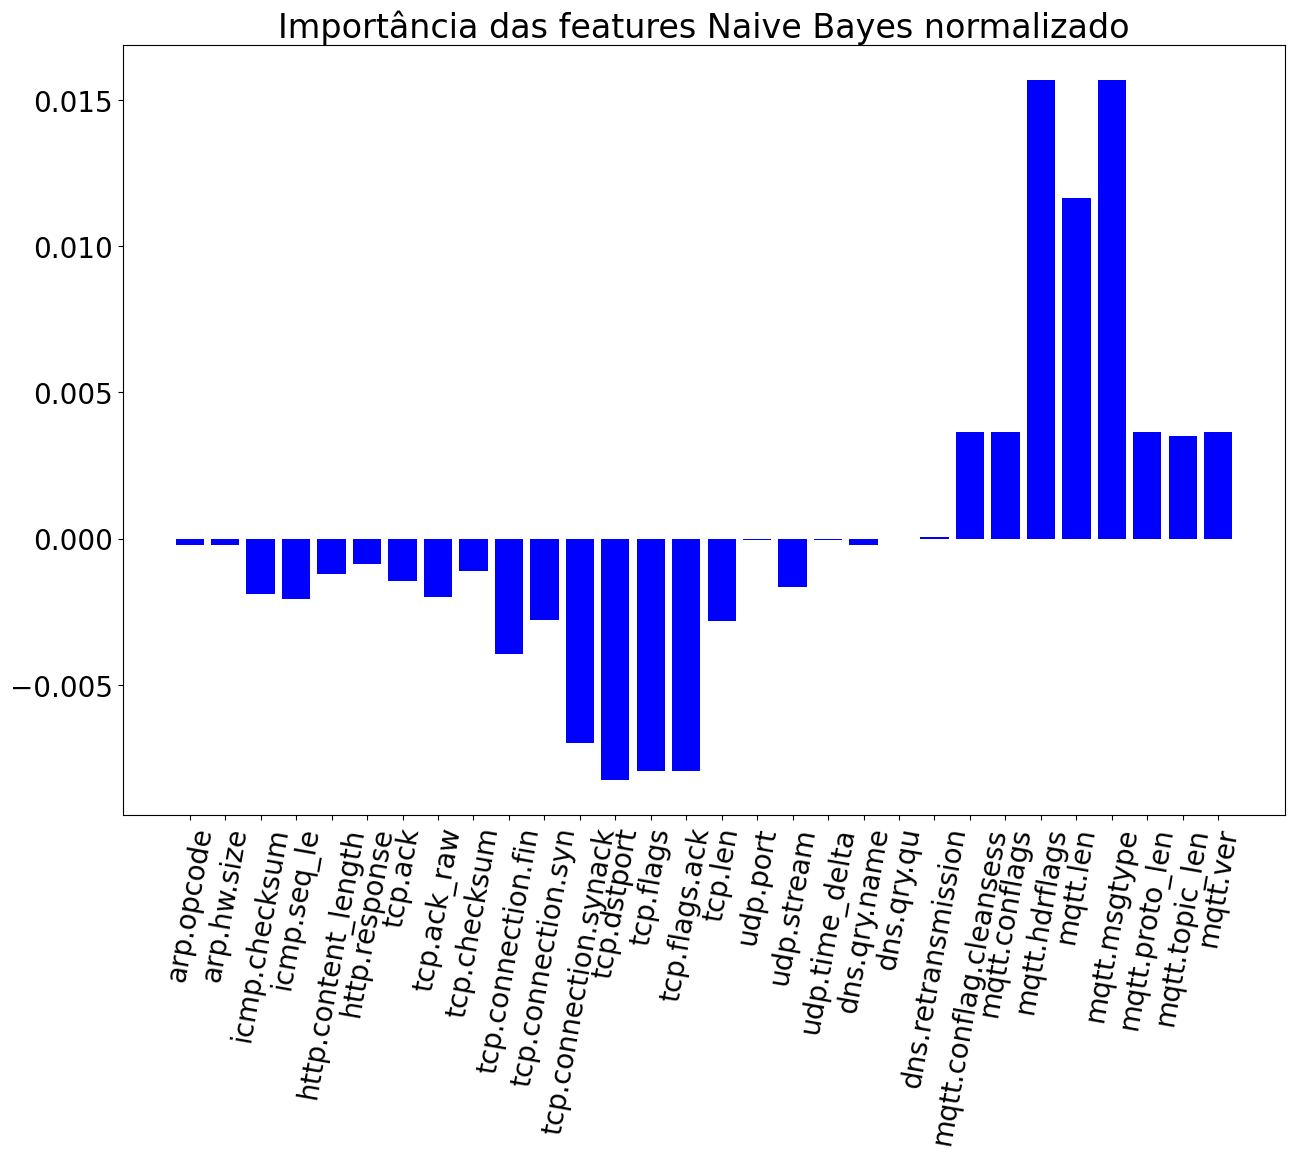

In [ ]:
  plt.figure(figsize=(15, 10))
  font = {'size': 20}
  plt.rc('font', **font)

  plt.bar(features_, importances_, color="blue")
  plt.xticks (features_, rotation = 80, fontsize = 20)


  plt.title('Importância das features Naive Bayes normalizado')
  plt.show()